# Imports

numpy import to handle arrays

pandas to handle dataset as dataframe in pandas and all other columns and row level modifications of data

seaborn for plotting graphs of high level

matplotlib is basic graphs also to support seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the Dataset
Here we are using iris dataset which is a famous dataset from Fisher R.A botanist <br>
The dataset consits of fifty instances , four features and three classes

In [2]:
dataset = pd.read_csv('..//data//iris_dataset//iris.csv')
x_labels = ['sepal length', 'sepal width', 'petal length', 'petal width']
y_labels = ['iris']

# Understanding the data
# Checking for null's
As part of machine learing , in the section of pre processing of our data we start with checking if there are any null's in our data.<br>
This step is required because while passing the data to the machine learning model, the model would not be able to process null's and would raise an exception.<br>
`what to do with these nulls then..?`<br>
`` Depends on your data preposseing skills`` <br>
You can either ...
* if catorgical data is missing , you can remove those rows if they are not a large number of rows compared to whole data
* if its numericl data,you can replace it by mean of the column.
* if its a time series data you can interpolate base on the previous timestamps data and next timestamps data
> Note : In the Iris dataset there are no nulls so the else part of the code is not written

In [3]:
if dataset.isnull().values.any():
    print('There are null in the dataset')
else:
    print('There are no nulls in the dataset') # In case nulls are there much more preprocessing is required by replacing nulls with appropriate values`


There are no nulls in the dataset


# Knowing the columns and datatypes
Here we are exploring the dataset to know what are numerical columns and what are catogorical columns. Knowing the columns 
would give us a better understanding of the data. Knowing the count of the data would tell us if all the columns have equal count or one  column is longer than other
> Note : In iris dataset all the columns are uniform and no columns is catogorical so no pre processing have been done. But in case of catogorical columns there is One hot encoding of catogorical columns required

In [5]:
dataset.info() # To Know the columns in the dataset and types of values and number of values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
iris            150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# Checking the scale of the data 
`dataset.describe()` would tell us min ,max,count standard diviation ,varience of each column idividually. <br>
This insight is required to know if feature scaling is required or not.<br>
All columns are sappose to under similar scale to be comaprible with each other.<br>
For example .... an age column would be of scale 0-100 where as salary would be around 1000-100000 so in the process of training the salary factor would have 1000 times more effect than age column on models learning.<br>
so we need to get down the scale of the all the columns to a uniform level and this process is called `feature scaleng`<br>
General Procedures of Feature Scaling 
* Normalization
* Standardization<br>

``Note:``
> * Here the process of feature scaling is not done since the sckit learn internally does feature scaling
> * There is no need for feature scaleing because there is no significant difference between min,max,mean of columns
> * There is not hard and fast rule that feature scaling need to be done. If its not done training the modle would be slower comparatively.

In [7]:
print(dataset.describe()) # To know min,max,count standard diviation ,varience in each column which would tell us if there is any outliers,normalization or standadization required.

       sepal length  sepal width  petal length  petal width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


# Viewing the data
This just to see the data to get an overview.
`dataset.head()` would give the first five columns of the data

In [8]:
print(dataset.head()) # To view first five columns of the dataset

   sepal length  sepal width  petal length  petal width         iris
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# Outlier check with the help of histogram
`Outlier`: stands for abnormally having a value which is way beyound the usual domain of values <br>
Why do we need to take care of outliers...?<br>
`Ans`: Some machine learning models are very much sensitive to these outliers.<br>
Sometimes in dataset instead of null they can also be replaced with some number as `99999` these numbers can appear as outliers which need to be taken care of <br>
Here we are drawing histogram so that if a bar appears way far from the the data we can identify visually.
`dataset.hist()`: This function would draw histograms for all numerical columns.
> Note: In iris dataset there are no outlier found so outlier processing have not been done.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E7017B5198>,
      dtype=object)

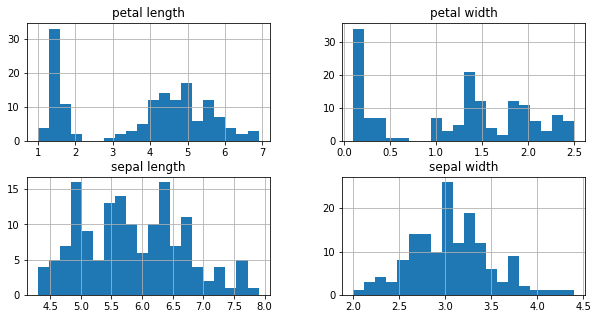

In [9]:
dataset.hist(column = x_labels,bins=20, figsize=(10,5))

# Visualizing the dataset
In this we are drawing pair plots to check relation of one feature with every other feature, to ge a overview of how each feature is realated with every other feature

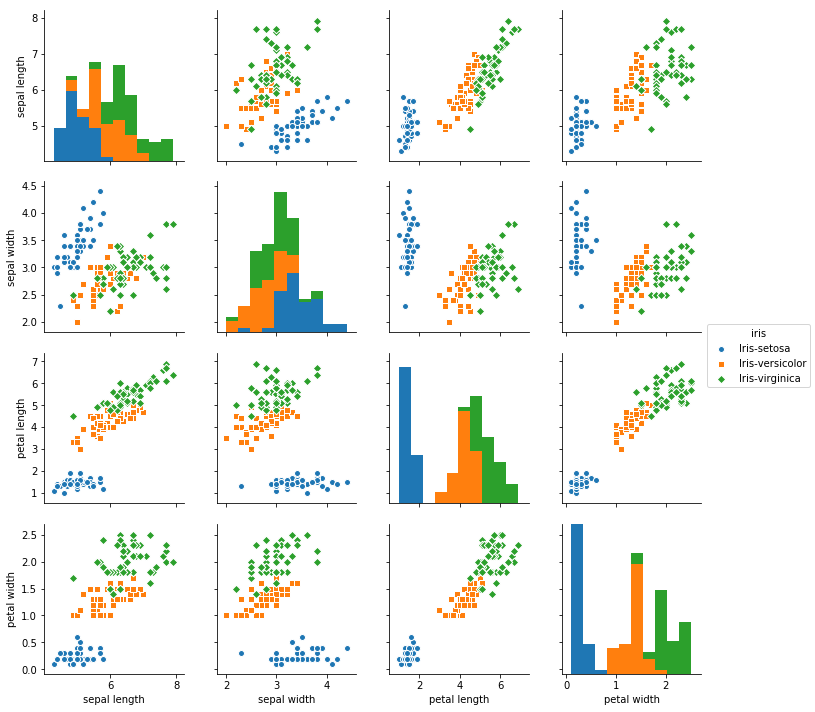

In [11]:
sns.pairplot(dataset, hue=y_labels[0], size=2.5,markers=["o", "s", "D"])

# Extracting dependent and Independent varibles
We are extracting the dependent varibles and Independent varibles. Based on the values of dependent varibles the model would try to predict the appropriate Independent varible.<br>
`y.ravel()` in line 3 is just to convert 2-D vector into 1-D vector. In further code framework model would be expecting a 1-D vector

In [14]:
X = dataset[x_labels].values
y = dataset[y_labels].values
y = y.ravel() # we would be requiring 1-D array for processing in further code

# Test-Train Split
We are Spliting the dataset into two sets ,One is train set on which the model would be trained and another is test set on which the model would try to make predictions.<br>
Based on the knowledge acquired on train set the model would try to make well educated predictions on test set data.<br>
`test_size`: this attribute of the function would tell in what ratio the dataset need to be split.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Encoding catogorical columns